In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [10]:
# Display the first few rows of the dataset
print("Train Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())

# Summary statistics
print("\nTrain Data Summary:")
print(train_data.describe(include='all'))
print("\nTest Data Summary:")
print(test_data.describe(include='all'))

# Check for missing values
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

# Data types of each column
print("\nData Types in Train Data:")
print(train_data.dtypes)
print("\nData Types in Test Data:")
print(test_data.dtypes)


Train Data:
         Date_Time   Sex         Nation        Job Freelance_Status  \
0  8/27/2014 13:47  Male  United States   Business               No   
1  8/29/2014 14:31  Male  United States    Student              Yes   
2  8/27/2014 11:34  Male             US     Others              NaN   
3  8/28/2014 22:22  Male  United States  Housewife               No   
4  8/27/2014 14:53  Male  United States  Housewife               No   

  Genetic_Background Therapy         Indoor_Days Increasing_Stress  \
0                 No      No          15-30 days             Maybe   
1                Yes     Yes           1-14 days             Maybe   
2                 No     Yes  More than 2 months                No   
3                 No     Yes          15-30 days             Maybe   
4                 No     Yes    Go out Every day               Yes   

  Habit_Changes Psychological_History Emotional_Fluctuations  \
0         Maybe                    No                 Medium   
1           

In [12]:
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            # Fill missing categorical values with the mode
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            # Fill missing numerical values with the mean
            df[column].fillna(df[column].mean(), inplace=True)
    return df

train_data = fill_missing_values(train_data)
test_data = fill_missing_values(test_data)


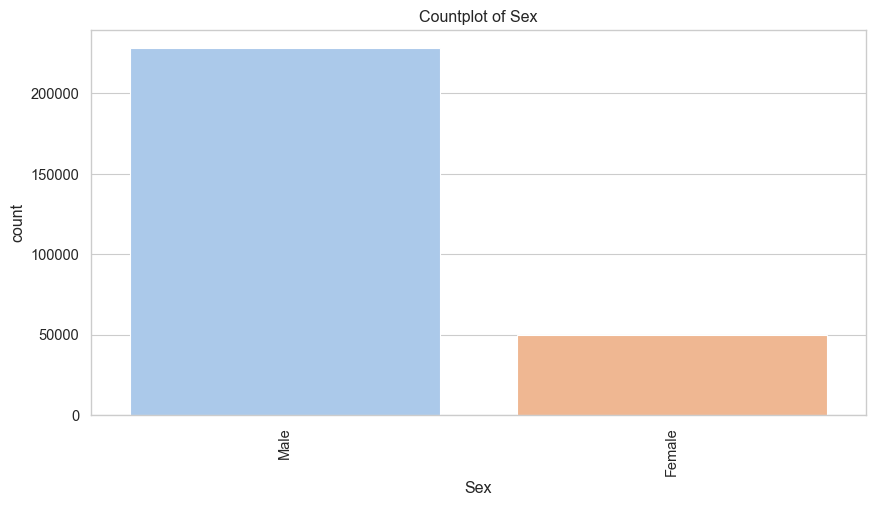

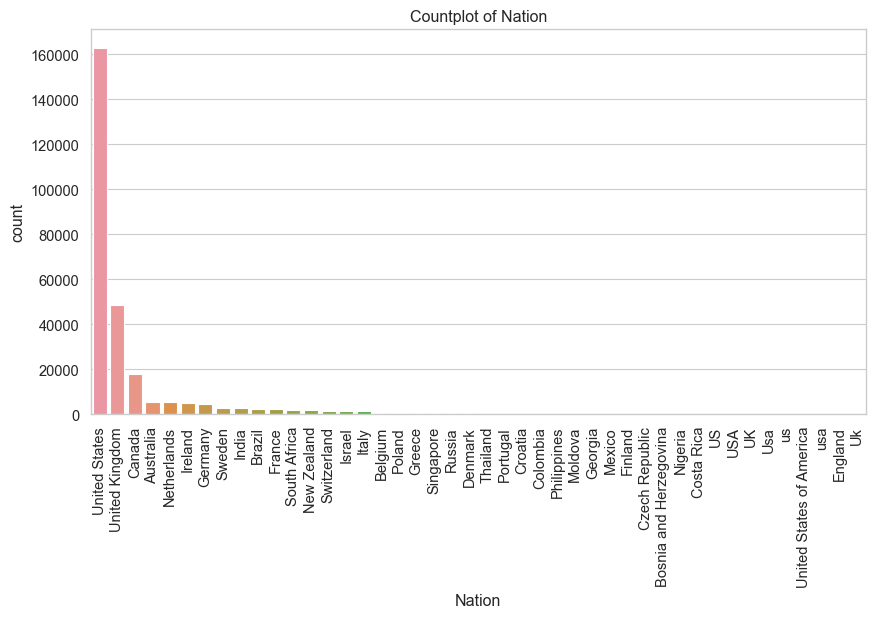

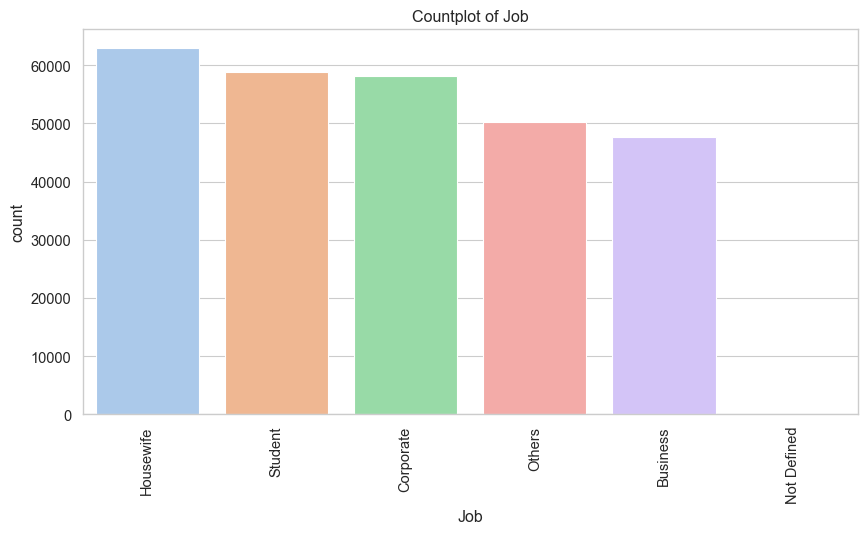

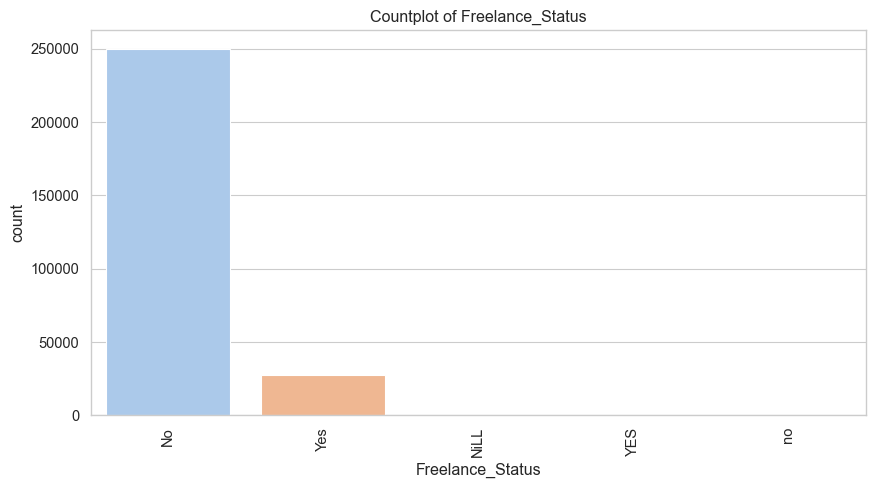

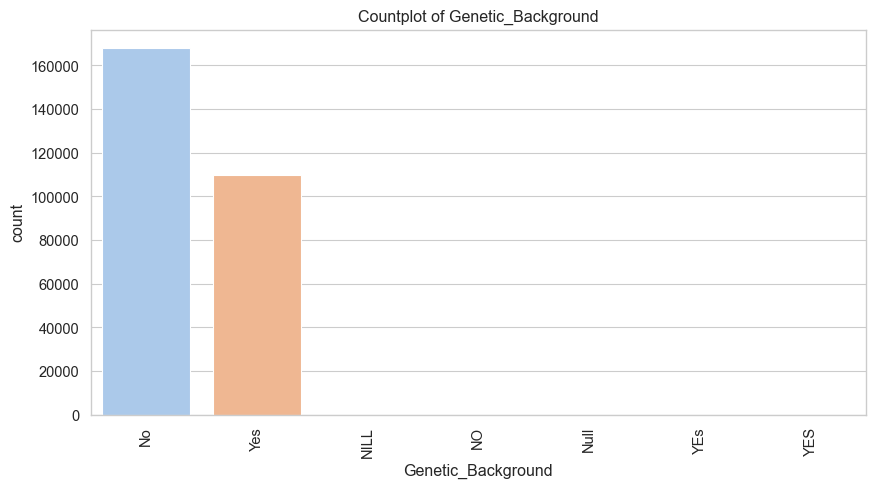

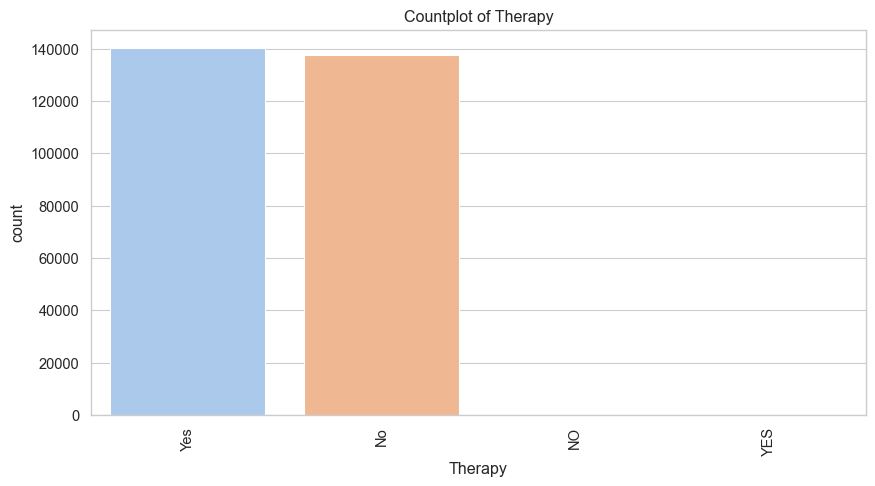

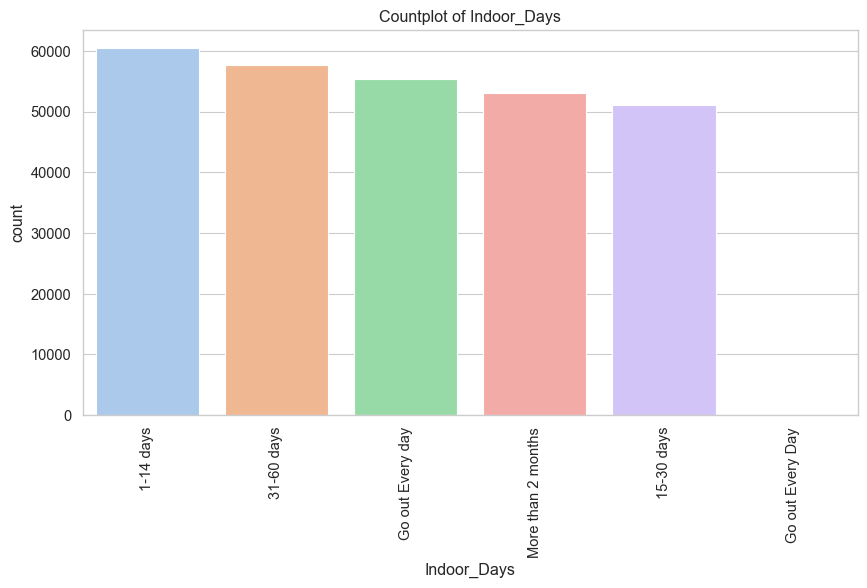

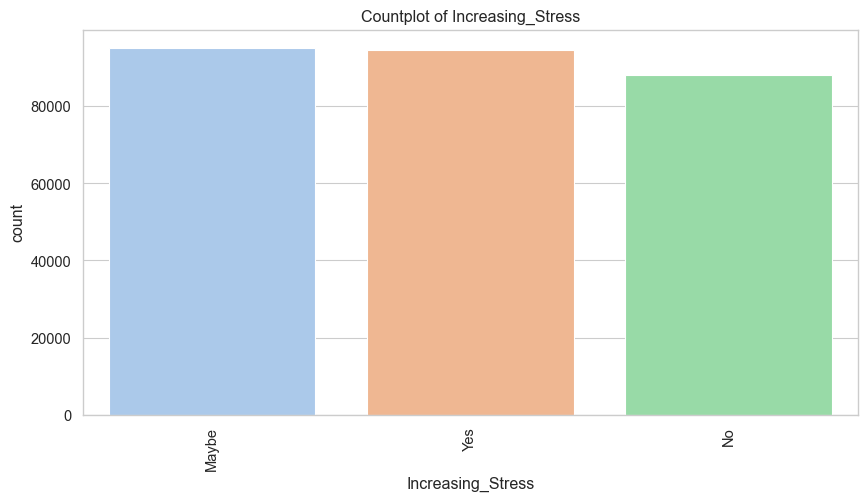

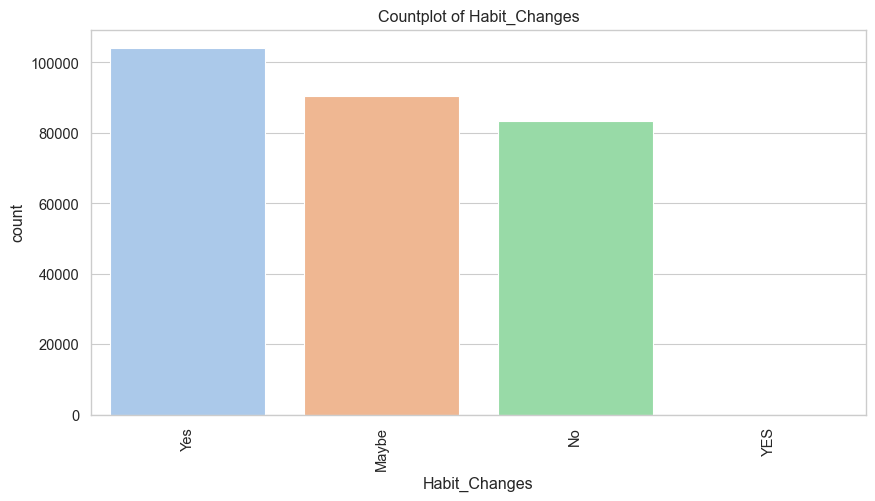

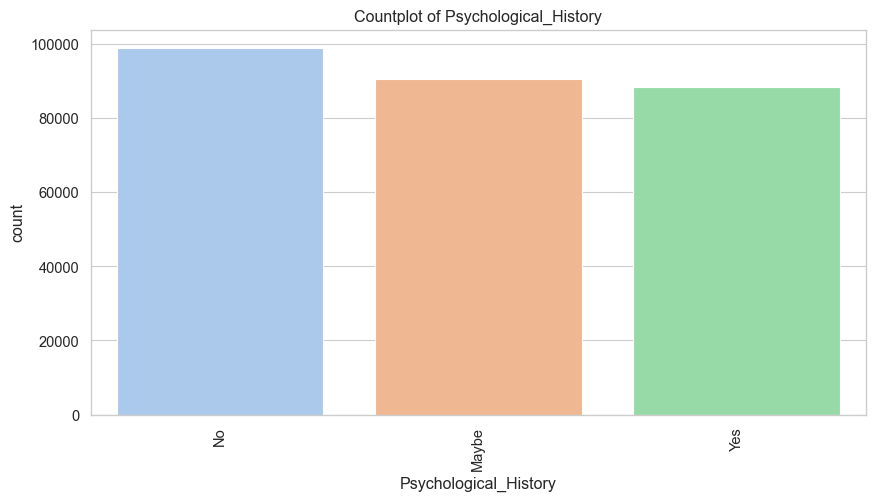

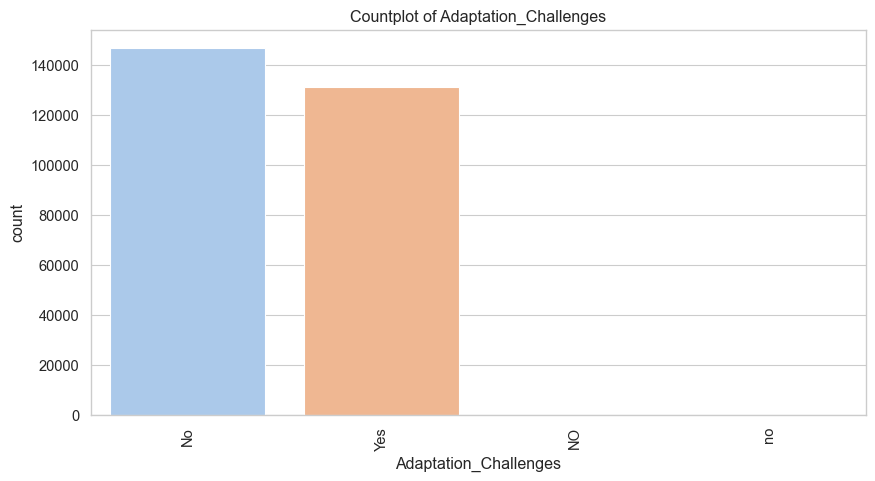

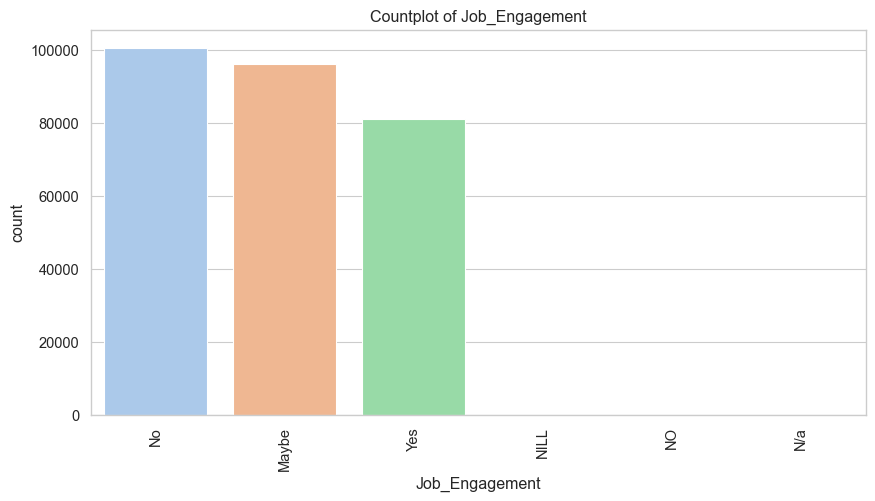

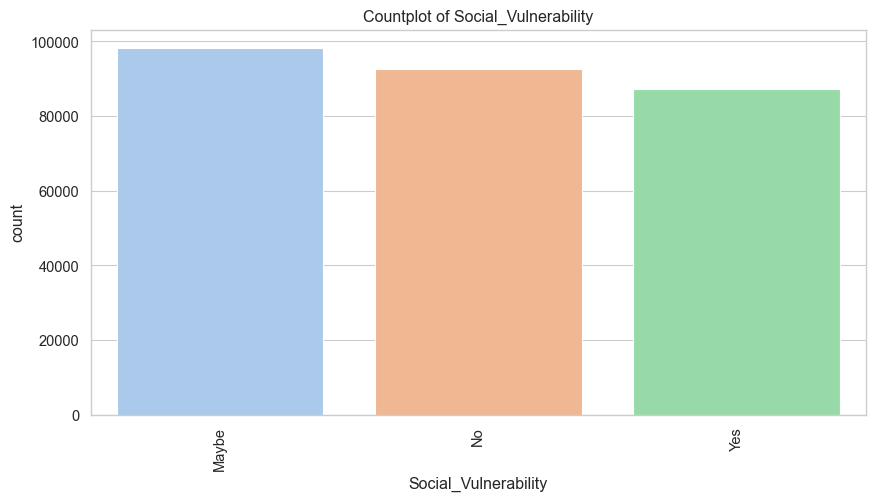

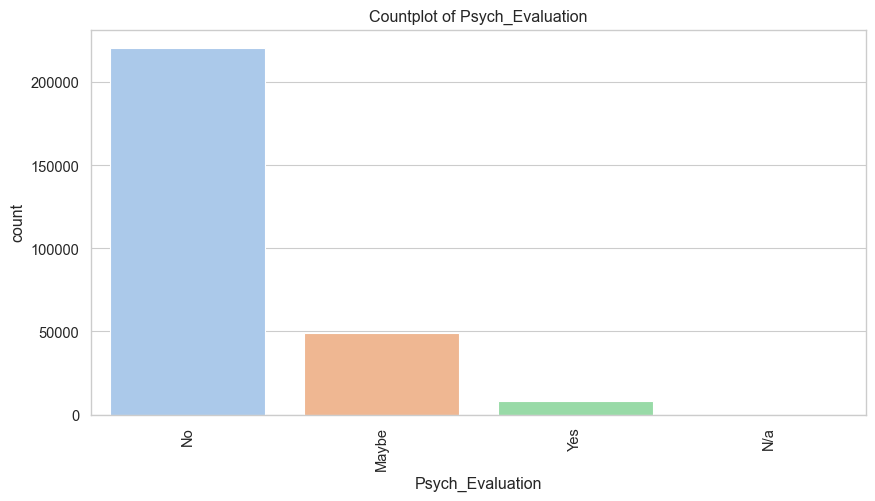

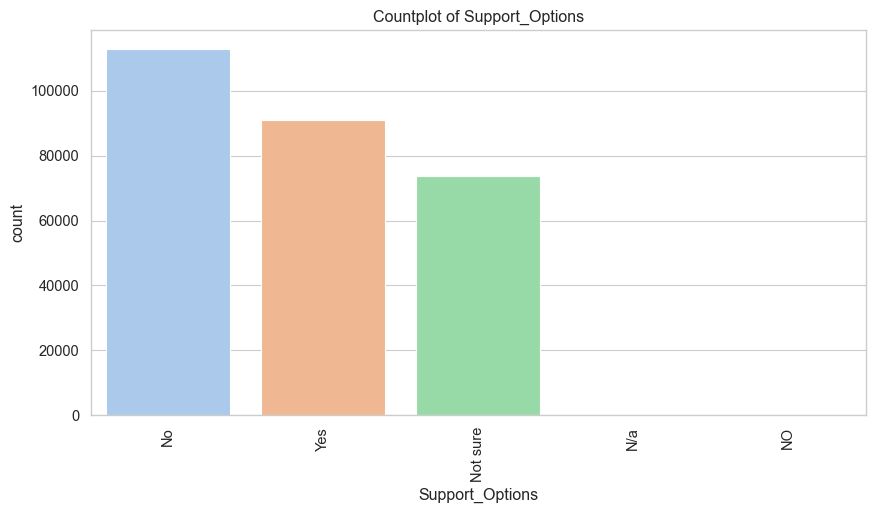

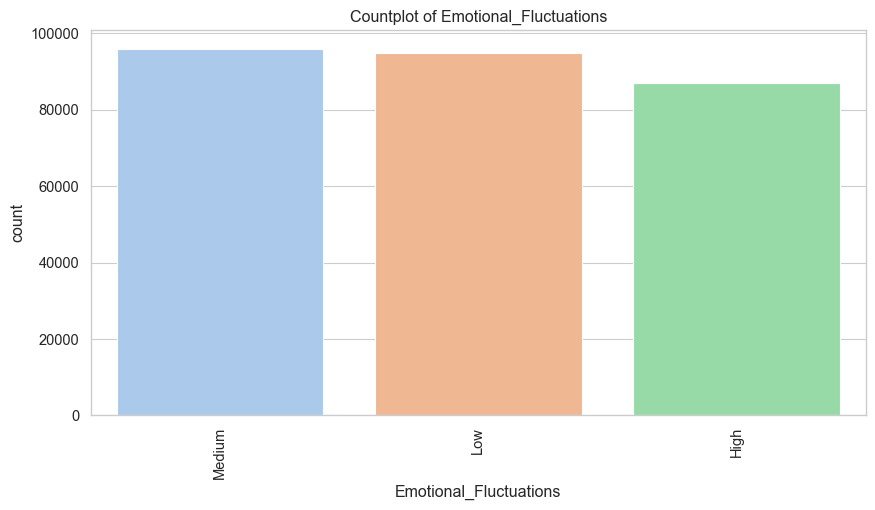

In [14]:
categorical_columns = ['Sex', 'Nation', 'Job', 'Freelance_Status', 'Genetic_Background', 
                       'Therapy', 'Indoor_Days', 'Increasing_Stress', 'Habit_Changes', 
                       'Psychological_History', 'Adaptation_Challenges', 'Job_Engagement', 
                       'Social_Vulnerability', 'Psych_Evaluation', 'Support_Options', 'Emotional_Fluctuations']

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_data, x=col, order=train_data[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Countplot of {col}')
    plt.show()


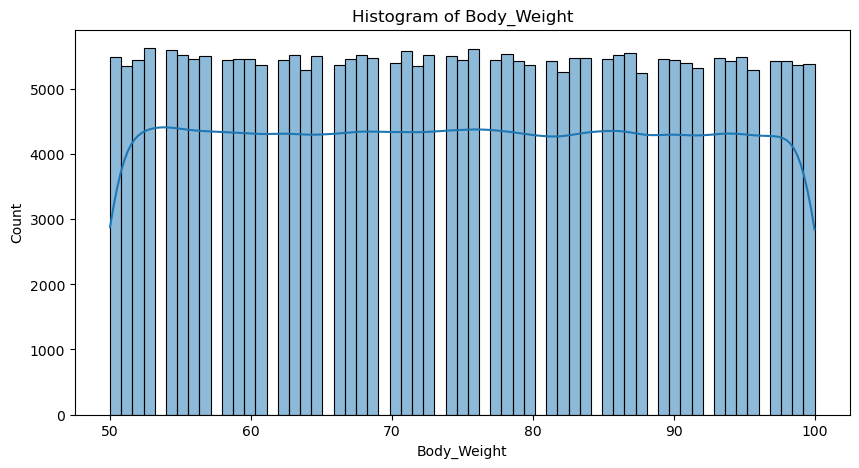

In [5]:
numerical_columns = ['Body_Weight']

for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


C:\Users\tehre\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


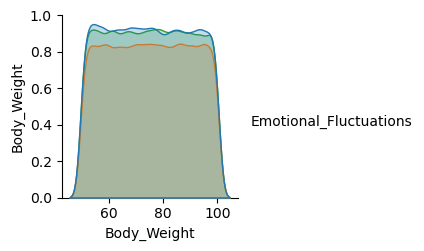

In [7]:
# Plot pairplot for numerical columns
sns.pairplot(train_data[numerical_columns + ['Emotional_Fluctuations']], hue='Emotional_Fluctuations')
plt.show()


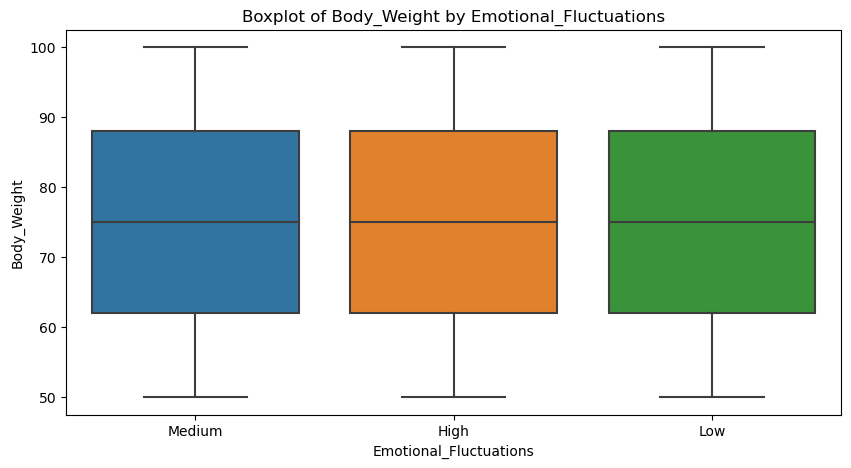

In [8]:
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Emotional_Fluctuations', y=col, data=train_data)
    plt.title(f'Boxplot of {col} by Emotional_Fluctuations')
    plt.show()
